In [18]:
import pandas as pd 
df = pd.read_csv("../found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...,QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe,".git,README.md,main.py,"
1,12D3KooWGc7qCqwQvx9r96hwtmVhJSiXKK1qMFunXP3Kic...,QmUVTKsrYJpaxUT7dr9FpKq6AoKHhEM7eG1ZHGL56haKLG,text/plain
2,12D3KooWQvVfZMKUaMeDBS7QPHL2APY4ANDPUzyaCSesos...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWBFjLgj4rdUUfLdmXwrtVgrq5FiyjkxoJYQNVT5...,NaN,NaN
4,12D3KooWT1jCHWHYxtgsKvNqK6a3n2u5U9pfqjfWtjhdVL...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


<Axes: xlabel='filesAsStr'>

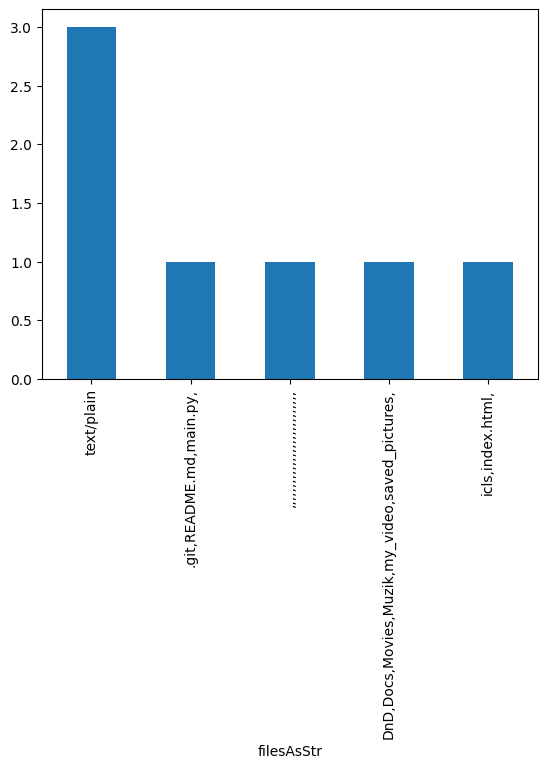

In [24]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
total = len(df)
df["filesAsStr"].value_counts().plot.bar()

In [28]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            types_of_files[f]+=1
    else:
        types_of_files[file]

['.git,README.md,main.py,',
 'text/plain',
 'text/plain',
 ',,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'DnD,Docs,Movies,Muzik,my_video,saved_pictures,',
 'icls,index.html,',
 'text/plain']